# Read Experimental Data
 This `notebook` goes over how to read the recorded experimental data with __*synapse*__.
 We will go over every step
 1. Select and load the experiment data
 2. Conversion into matrix format for plotting and analysis
 3. Obtain <font color = green>FFT</font> 
 4. Plot!

### alright let's do _this_!
<br>
***
First lets import the libraries that we will be using:

In [11]:
import tdt # These are the functions for tdt
import pandas as pd 
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt # this is used for plotting

We ask for the directory where the experiment is!

In [8]:
from tkinter import Tk, filedialog
root = Tk() # pointing root to Tk() to use it as Tk() in program.
root.withdraw() # Hides small tkinter window.
root.attributes('-topmost', True) # Opened windows will be active. above all windows despite of selection.
exp_path = filedialog.askdirectory(parent=root, initialdir='C:/TDT/Synapse/Tanks',title= 'Hello! Please select the experiment to load!') # Returns opened path as str
print(exp_path)


C:/TDT/Synapse/Tanks/Rec_StimJHU-210915-132412/sub-7-211020-140142


### Import the synapse data!
Now we know the path to the directory where the data is so we load it using the __*`tdt`*__ functions

In [9]:
data = tdt.read_block(exp_path)

Found Synapse note file: C:/TDT/Synapse/Tanks/Rec_StimJHU-210915-132412/sub-7-211020-140142\Notes.txt
read from t=0s to t=105.1s


### Plot the stimulation streams as they are

<function matplotlib.pyplot.show(close=None, block=None)>

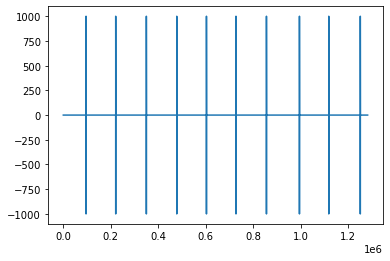

In [12]:
plt.figure(0)
plt.plot(data.streams.eS1r.data[0,:])
plt.show

### Plotting all recording after stim

<function matplotlib.pyplot.show(close=None, block=None)>

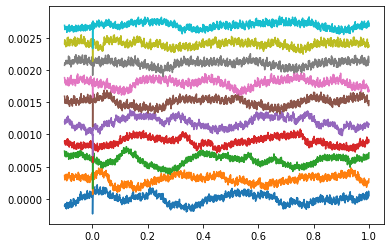

In [19]:
plt.figure(1)
for pulse in range(0,np.size(peak_locs)):
    start_idx = int(lfp_locs[pulse]-305)
    end_idx = int(lfp_locs[pulse]+3052)
    stacked_responses[:,:,pulse] = lfp_data[:,start_idx:end_idx]
    plt.plot(time_vect,stacked_responses[0,:,pulse]+.0003*pulse)

plt.show

### Average Response to stimulation

### Doing preliminary spectral analysis
Things to do still:
- normalize
- Check fft parameters. If possible do it with wavelets.


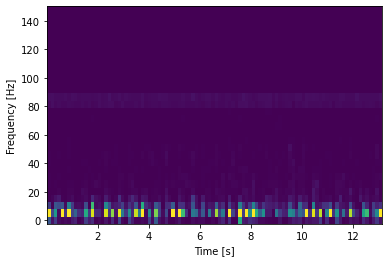

In [18]:
fs_lfp = data.streams.TET1.fs
fs_stim = data.streams.eS1r.fs
peaks = scipy.signal.find_peaks(data.streams.eS1r.data[0,:],height=100,distance=8)
peak_locs = peaks[0]
lfp_locs = peak_locs*fs_lfp//fs_stim
time_vect = np.arange(305+3052)/fs_lfp - .1
stacked_responses = np.empty((4,305+3052,np.size(peak_locs)))
lfp_data = data.streams.TET1.data

f, t, Sxx = scipy.signal.spectrogram(lfp_data[1,:],fs_lfp,window=('hamming'),nperseg=600,noverlap=200)
Sxx_altered = 10e15*Sxx
plt.figure(3)
plt.pcolormesh(t[0:100],f[0:30],Sxx_altered[0:30,0:100],vmin=30,vmax=6000000,shading ='auto')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.show()

In [1]:
!pip install jupyterthemes

In [2]:
!pip install --upgrade jupyterthemes

In [15]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [23]:
!jt -t chesterish -T -N -kl -f hack -fs 12 -tf ubuntu -tfs 15 -nf oxygen -nfs 150 -ofs 11 -dfs 11 -cellw 88% -lineh 190 -cursc o -cursw 5 -altp

In [2]:
!jt -r

Reset css and font defaults in:
C:\Users\dehrens1\.jupyter\custom &
C:\Users\dehrens1\AppData\Roaming\jupyter\nbextensions


In [24]:
!pip install jupyterlab_darkside_ui

  Attempting uninstall: parso
    Found existing installation: parso 0.8.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.



    Uninstalling parso-0.8.2:
      Successfully uninstalled parso-0.8.2
  Attempting uninstall: jedi
    Found existing installation: jedi 0.18.0
    Uninstalling jedi-0.18.0:
      Successfully uninstalled jedi-0.18.0
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.1.0
    Uninstalling nbconvert-6.1.0:
      Successfully uninstalled nbconvert-6.1.0


In [6]:
x=1
x

1

In [4]:
import time
import string 
import random

def randword(delay=1, length=10):
    time.sleep(delay)
    return ''.join(
        random.choice(string.lowercase) 
        for i in range(length)
    )


In [5]:
x=10

In [6]:
x


10